# Credit Card Fraud Detection

**Data Set** - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [452]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [453]:
# Read CSV File
CC_dataset = pd.read_csv('creditcard.csv')
CC_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 1 - Preprocessing & EDA
##### With the data already being clean let's understand our dataset

In [455]:
# Find total number of rows and columns
CC_dataset.shape

(284807, 31)

In [456]:
# See if there are null values
CC_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Really interested in the 'Class' and 'Amount' Variables

In [458]:
# Find the number of rows with fraudulent and non-fraudulent purchases
fraud = CC_dataset[CC_dataset['Class'] == 1]

normal = CC_dataset[CC_dataset['Class'] == 0]

len(fraud), len(normal)

(492, 284315)

In [459]:
# Investigate difference in 'Amount' between Fraud transactions
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [460]:
# Doing the same for normal transactions
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

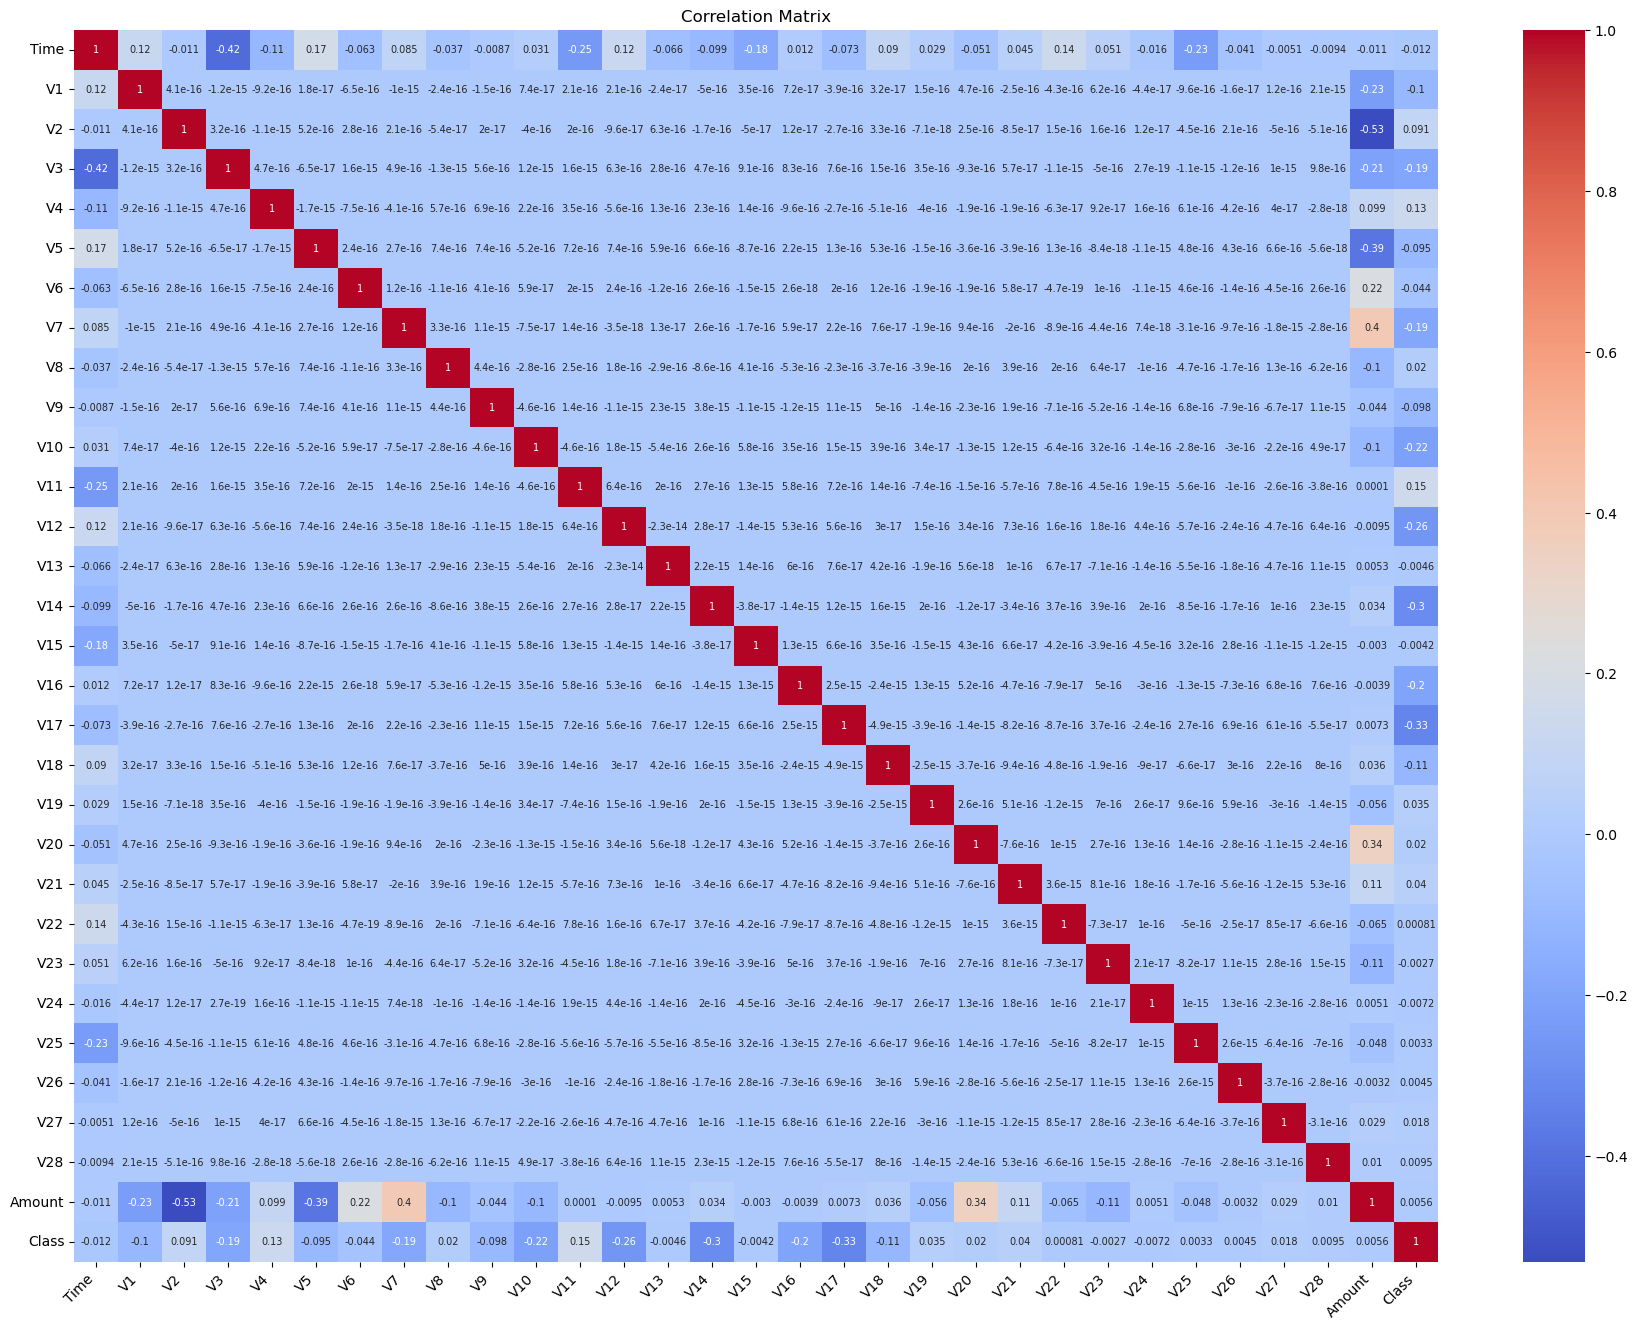

In [461]:
# Calculate the correlation matrix for fraud data
correlation_matrix = CC_dataset.corr()

# Plot the heatmap and show data labels for corr
# This is to understand how the variables interact, particularly with the 'Class' and 'Amount' Variable variable
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 7}, cmap='coolwarm')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(fontsize=10)  # Adjust y-axis labels font size
plt.title('Correlation Matrix')
plt.show()

# Initial sizing in heatmap was too small, so I had to make adjustments to see the data

## Step 2 - Handling the Data Imbalance
##### Before going any further we must tackle the imbalance in our data
##### This is because if we ignore the issue our models may prioritize accuracy with the normal transactions while neglecting the fraud transactions

In [463]:
# Downsample the normal class to have same size as fraud class
df_normal_downsampled = normal.sample(n=len(fraud))

# resample fraud
fraud_resampled = fraud.sample(frac = 1)

# Combine the two dataframes
combined = pd.concat([df_normal_downsampled, fraud_resampled])

In [464]:
# Check for 984 rows (This would be correct as the number of fraud rows 492 would be doubled)
combined.shape

(984, 31)

### Why I choose not to oversample: 
##### In the scenario I see oversampling as a mistake as in general fraudulent transactions are rare and if we trained a model on a dataset with an inflated amount of artifical fraud transactions, the model could learn to identify patterns specific to articially boosted fraud transactions. If used in a real scenario, it would encounter issues as the frequency of fraudulent transactions wouldn't match the dataset it was trained on.

## Step 3 - Creating Different Models

#### Logistic Regression

In [468]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [469]:
# Create features (X) and labels (y)
X = combined.drop('Class', axis=1)  # Assuming 'label' is the column indicating fraud or not
y = combined['Class']

# Split the data into training and testing sets 
# Get a test set of roughly 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use sparse matrices as there are issues with memory storage
X_train_sparse = sp.csr_matrix(X_train)
X_test_sparse = sp.csr_matrix(X_test)

# Initialize the logistic regression model
logReg_model = LogisticRegression()

# Train the model
logReg_model.fit(X_train_sparse, y_train)

# Make predictions on the test set
y_pred_log = logReg_model.predict(X_test_sparse)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[140   4]
 [ 14 138]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       144
           1       0.97      0.91      0.94       152

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



#### K-Nearest Neighbors Classifier

In [471]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.sparse as sp

In [472]:
# Initialize the KNN model with fewer neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train_sparse, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_sparse)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[143   1]
 [ 24 128]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       144
           1       0.99      0.84      0.91       152

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



#### Random Forest

In [474]:
from sklearn.ensemble import RandomForestClassifier

In [475]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train_sparse, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_sparse)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[142   2]
 [ 15 137]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       144
           1       0.99      0.90      0.94       152

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



## Step 4 - Evaluating Models Performance

Overall, I think all three of my models above performance quite well, with the logistic regression model performing the best. In my logistic regression model and random forest model, the models precision was high for both classes. The same could not be said for the normal transactions in the KNN model, with a percision of around 86%. The percision for fraud transactions in all three of my models were much higher than normal transactions. I am actually okay with this though as I find it more important to minimize the false negatives, as a false negative could result in bigger financial losses for both the financial institution and the consumer. Additionally, a false negative might lead to a consumer switching to a different financial institution. Although the three models performaned well, I want to see if using them together would make our performance better.

## Step 5 - Making Overall Model 
##### Although we have relatively accurate models, using them together has the possiblity of making an even better model so let's try it out

#### Soft Voting
##### In the end I choose to use Soft Voting because in my mix of models, I have two models that provide more probabilistic predictions (Logistic Regression and Random Forest)

In [479]:
from sklearn.ensemble import VotingClassifier

In [480]:
# Initialize Voting Classifier with soft voting
voting_mod = VotingClassifier(estimators=[
    ('lr', logReg_model),
    ('knn', knn_model),
    ('rf', rf_model)
], voting='soft')

# Train the Voting Classifier
voting_mod.fit(X_train_sparse, y_train)

# Make predictions on the test set
y_pred_voting = voting_mod.predict(X_test_sparse)


# Evaluate the model
print(confusion_matrix(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

[[143   1]
 [ 15 137]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       144
           1       0.99      0.90      0.94       152

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



## Conclusions

Overall I am quite happy with my model. Many of the techniques used throughout this project were completely new to me and I believe having a model with roughly 95%, although not perfect, is still a good performance. 

Key Takeaways:
- By employing a technique like soft voting, I was able to reduce the variability in the results across different samples.
- Utilizing a library like scikit-learn significantly improved the process's efficiency and allowed me to test new modeling techniques more effectively. It is defintely a library that I will choose to use again in the future.
- After attempting the project, I would like to better understand how different modeling techniques vary from one another and which modeling techniques would compliment each other when creating an overarching model using something like soft voting.